In [40]:
import pandas as pd
import numpy as np
import warnings
from plotnine import *
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import datasets
import scipy
import scipy.cluster.hierarchy as shc

#df = pd.read_excel("/home/laptop_eh/scripts/data-mining/entrega1/MicroCredit.xlsx", sheet_name="MicroCredit")
#df = pd.read_excel("https://github.com/stbs22/scripts/raw/master/data-mining/entrega1/MicroCredit.xlsx")

(42264, 17)

Clientes repetidos:  31915


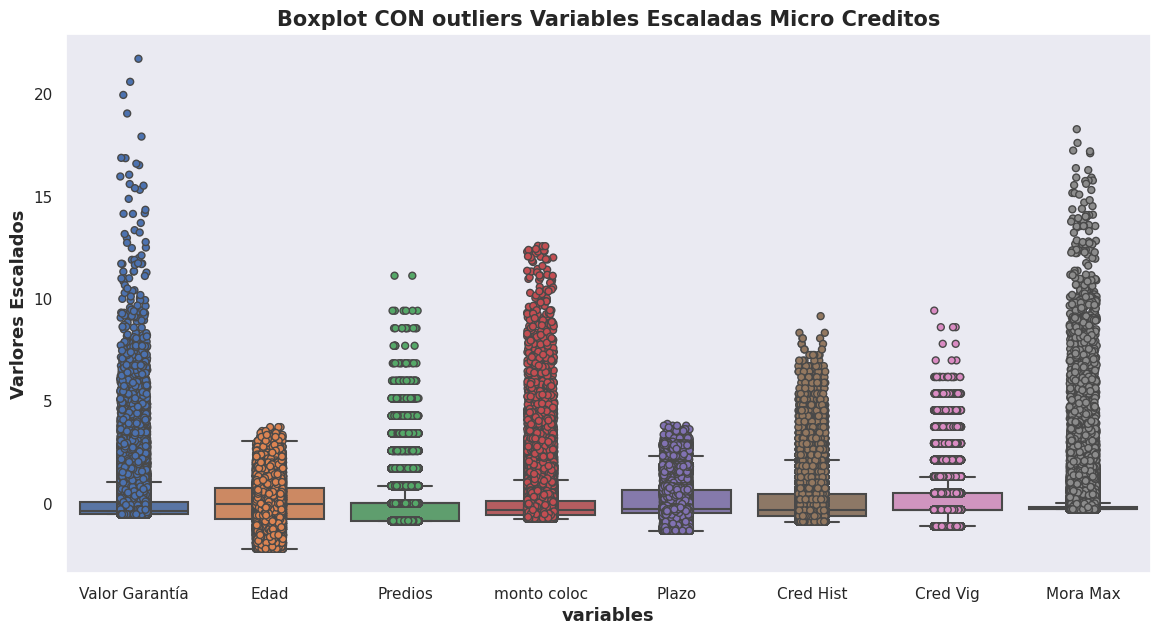

Rango 13.61 Q1 0.0 Q3 13.61
Rango 16.0 Q1 33.0 Q3 49.0
Rango 1.0 Q1 1.0 Q3 2.0
Rango 16.7233 Q1 8.6067 Q3 25.33
Rango 12.0 Q1 21.0 Q3 33.0
Rango 4.0 Q1 1.0 Q3 5.0
Rango 2.0 Q1 0.0 Q3 2.0
Rango 20.0 Q1 0.0 Q3 20.0


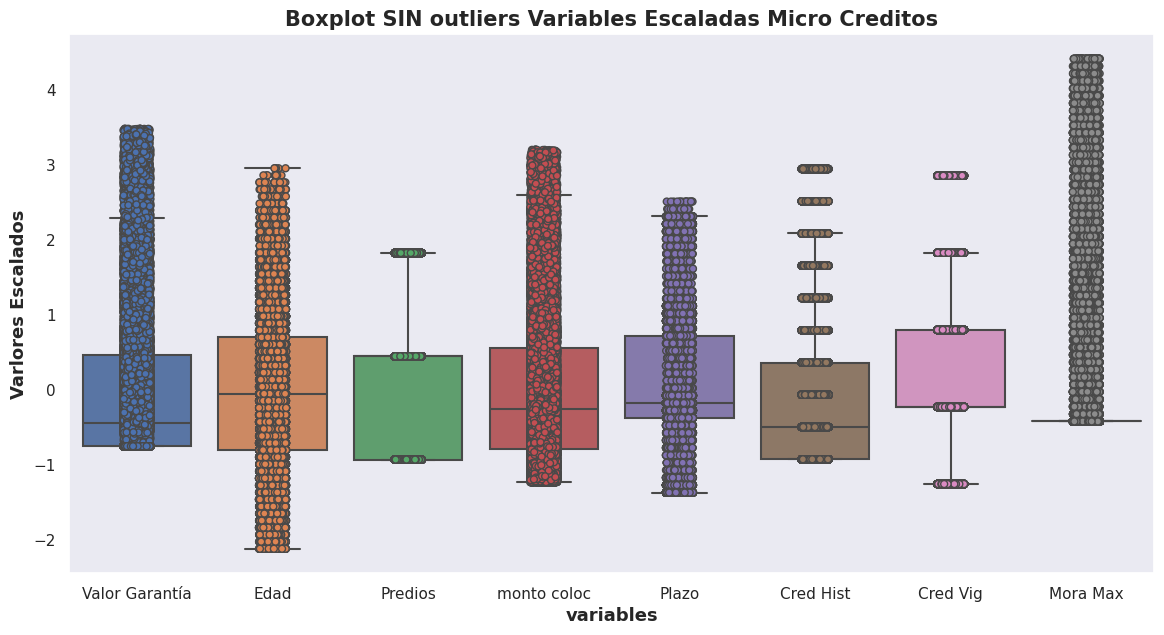

Sol               0
Cliente           0
region            0
RUBRO             0
Aval              0
Garantía          0
Valor_Garantía    0
Edad              0
Tenencia          0
Predios           0
monto_coloc       0
Plazo             0
Cred_Hist         0
Cred_Vig          0
Mora_Max          0
Defaulter         0
dtype: int64
[0 1]
[1 0]


In [50]:
# FUNCIONES

#Adquirir datos de Micro Credit
df = pd.read_excel("https://github.com/stbs22/scripts/raw/master/data-mining/entrega1/MicroCredit.xlsx")


# Nº1 -> Funcion para remover outliers utilizando rango intercuantil

def remover_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)

    iqr = q3-q1 #Interquartile range
    
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    
    print("Rango "+str(iqr)+" Q1 "+str(q1)+" Q3 "+str(q3))
    
    df = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df


# Nº2 -> Funcion de Boxplot de las 8 Variables numericas

def Boxplt(df_in,titulo):
    df_numeric = df_in[['Valor_Garantía','Edad','Predios','monto_coloc','Plazo','Cred_Hist','Cred_Vig','Mora_Max']]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df_numeric)

    df1 = pd.DataFrame(scaled_features, columns=['Valor Garantía','Edad','Predios','monto coloc','Plazo','Cred Hist','Cred Vig','Mora Max'])
    plt.figure(figsize=(14,7))
    ax = sns.stripplot(x='variable', y='value', data = pd.melt(df1), jitter=True, linewidth=1, edgecolor='gray')
    ax = sns.boxplot(x='variable', y='value', data = pd.melt(df1), fliersize=0)
    ax.set_xlabel("variables", fontsize=13, fontweight='bold')
    ax.set_ylabel("Varlores Escalados", fontsize=13, fontweight='bold')
    ax.set_title(titulo, fontsize=15, fontweight='bold')
    plt.show()
    return

# Variable Cliente con usarios repetidos

total_datos = df.shape[0]
clientes_uniq = len(df['Cliente'].unique())

print('Clientes repetidos: ', (total_datos - clientes_uniq))

# Visualizar Variables numericas con outliers
Boxplt(df,"Boxplot CON outliers Variables Escaladas Micro Creditos")


# Eliminar Outliers
lista_variables = ['Valor_Garantía','Edad','Predios','monto_coloc','Plazo','Cred_Hist','Cred_Vig','Mora_Max']
for var in lista_variables:
    df = remover_outlier(df,var)

#Eliminar columna de "area"
df = df.drop(['area'], axis=1)

#Cambiar variable "Tedencia" de cuanitativa a cualitativa
df["Tenencia"] = df["Tenencia"].replace(["A"],1).replace(["B"],2).replace(["C"],3).replace(["D"],4)

# Visualizar Variables numericas sin outliers
Boxplt(df,"Boxplot SIN outliers Variables Escaladas Micro Creditos")

# Analiza cuantos datos "NULL" tiene cada columna(Variable)
print(df.isnull().sum())

# Analisis Variable Aval(Binaria)
print(df.Aval.unique())
# Con esta linea comprobamos que valores se encuentran en esta variable. Se realizará lo mismo con la variable Garantía
print(df.Garantía.unique())

In [24]:
# Clustering jerarquico aglomerativo (Esteban Hernandez)

# Abstraemos el 15% de los datos para la alimentacion del modelo
df_sample = df.sample(frac=0.15, replace=False, random_state=66)

# Entrenamos un modelo por cada metodo jerarquico para determinar la mejor opción
modelo_ward = shc.linkage(df_sample[lista_variables], method='ward')
modelo_single = shc.linkage(df_sample[lista_variables], method='single')
modelo_complete = shc.linkage(df_sample[lista_variables], method='complete')
modelo_avarage = shc.linkage(df_sample[lista_variables], method='average')

print(scipy.__version__)

1.9.0


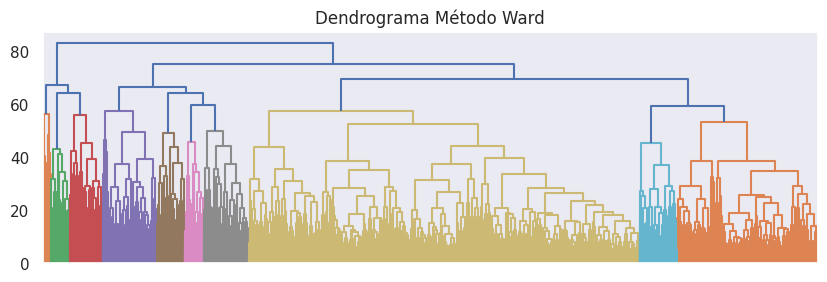

In [51]:
# Dendrograma Avarage
# No disponible para colab

try: 
  plt.figure(figsize=(10, 3))

  objeto = shc.dendrogram(modelo_complete)

  plt.title("Dendrograma Método Complete")  
  plt.xticks([])
  plt.show()
except (NameError, RecursionError) as e:
  print("Error de ejecución, explicación al final del código\n"+str(e))

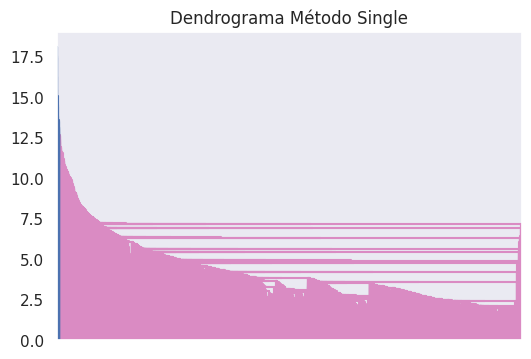

In [30]:
# Dendrograma single
try:
  plt.figure(figsize=(6, 4)) 

  objeto = shc.dendrogram(modelo_single)

  plt.title("Dendrograma Método Single")  
  plt.xticks([])
  plt.show()

except RecursionError as e:
  print("Error de Recursion para "+str(modelo_single.shape)+", Problemas de rendimiento...")
  print("Excepción: "+str(e))